In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the file

In [2]:
#Read the data 
books=pd.read_csv("C:/Users/JasJap/OneDrive/Desktop/KGJ_Minor/GR-Books.csv", sep = ',', error_bad_lines = False, encoding = 'latin-1')
print(f"Dataset shape : {books.shape}")
books.head()

Dataset shape : (2382, 7)


,Desc,Unnamed: 1,author,genre,url,rating,title
0,We know that power is shifting: From West to E...,0.0,MoisÃ©s NaÃ­m,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,1.0,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,2.0,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,3.0,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,4.0,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [3]:
books.info() #check the data types for each of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2382 entries, 0 to 2450
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Desc        2382 non-null   object 
 1   Unnamed: 1  1185 non-null   float64
 2   author      2382 non-null   object 
 3   genre       2382 non-null   object 
 4   url         2382 non-null   object 
 5   rating      2382 non-null   float64
 6   title       2382 non-null   object 
dtypes: float64(2), object(5)
memory usage: 148.9+ KB


In [4]:
books.describe()

,Unnamed: 1,rating
count,1185.000000,2382.000000
mean,596.875949,3.995223
std,346.103136,0.217733
min,0.000000,3.080000
25%,296.000000,3.870000
50%,601.000000,4.000000
75%,897.000000,4.140000
max,1193.000000,4.650000


In [5]:
books.isnull().sum()

Desc             0
Unnamed: 1    1197
author           0
genre            0
url              0
rating           0
title            0
dtype: int64

In [6]:
# Dropping the unnamed column
books.drop('Unnamed: 1', inplace=True, axis=1)
books.head()

,Desc,author,genre,url,rating,title
0,We know that power is shifting: From West to E...,MoisÃ©s NaÃ­m,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.63,The End of Power: From Boardrooms to Battlefie...
1,Following the success of The Accidental Billio...,Blake J. Harris,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.94,"Console Wars: Sega, Nintendo, and the Battle t..."
2,How to tap the power of social software and ne...,Chris Brogan,Business,https://i.gr-assets.com/images/S/compressed.ph...,3.78,Trust Agents: Using the Web to Build Influence...
3,William J. Bernstein is an American financial ...,William J. Bernstein,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.20,The Four Pillars of Investing
4,Amazing book. And I joined Steve Jobs and many...,Akio Morita,Business,https://i.gr-assets.com/images/S/compressed.ph...,4.05,Made in Japan: Akio Morita and Sony


In [7]:
books['Desc'].unique()

array(["We know that power is shifting: From West to East and North to South, from presidential palaces to public squares, from once formidable corporate behemoths to nimble startups and, slowly but surely, from men to women. But power is not merely shifting and dispersing. It is also decaying. Those in power today are more constrained in what they can do with it and more at risk of losing it than ever before. In The End of Power, award-winning columnist and former Foreign Policy editor MoisÃ©s NaÃ\xadm illuminates the struggle between once-dominant megaplayers and the new micropowers challenging them in every field of human endeavor. Drawing on provocative, original research, NaÃ\xadm shows how the antiestablishment drive of micropowers can topple tyrants, dislodge monopolies, and open remarkable new opportunities, but it can also lead to chaos and paralysis. NaÃ\xadm deftly covers the seismic changes underway in business, religion, education, within families, and in all matters of wa

Dataset has six columns

- Desc -> Book description

- Genre -> Category(Type of book). I have taken only three genres like business, non-fiction and cooking for this problem

- Author -> Book Author

- title -> Book Name

- Rating -> Book rating given by the user

- url -> Book cover image link

### Genre distribution

<AxesSubplot:>

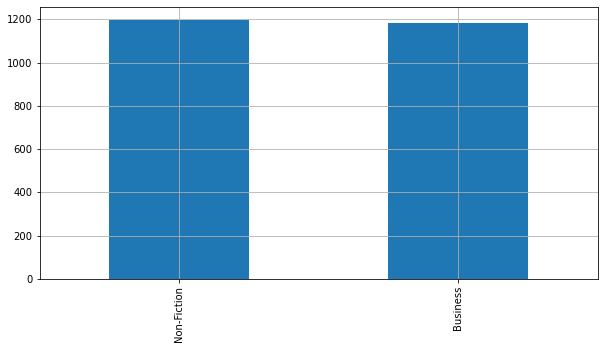

In [9]:
books['genre'].value_counts().plot(x = 'genre', y ='count', kind = 'bar',grid = True, figsize = (10,5))

### Word Count Distribution

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

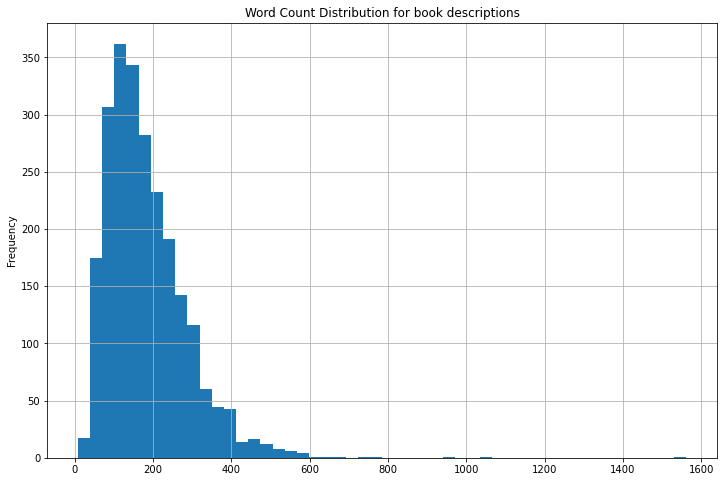

In [10]:
# Calculating the word count for book description
books['word_count'] = books['Desc'].apply(lambda x: len(str(x).split()))# Plotting the word count
books['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8), grid = True, title='Word Count Distribution for book descriptions')

### Printing the book title and description randomly

In [12]:
print("TITLE ---> ",books['title'] [383])
print()
print(books['Desc'][383])

TITLE --->  Pitch Perfect: How to Say It Right the First Time, Every Time

Your guide to becoming an explanation specialist.Youâve done the hard work. Your product or service works beautifully - but something is missing. People just donât see the big idea - and itâs keeping you from being successful. Your idea has an explanation problem.The Art of Explanation is for business people, educators and influencers who want to improve their explanation skills and start solving explanation problems.Author Lee LeFever is the founder of Common Craft, a company known around the world for making complex ideas easy to understand through short animated videos. He is your guide to helping audiences fall in love with your ideas, products or services through better explanations in any medium. You will learn to:â¢	Plan: Learn explanation basics, what causes them to fail and how to diagnose explanation problems.â¢	Package: Using simple elements, create an explanation strategy that builds confiden

#### As from the above plot ,we observe that book description is not too long. It is clear that good reads provide just a short description to get an overview what a particular book is all about.

Also we can see that there are some special characters that are not meaningful in the description column. So, in order to  need to rectify it, we need to clean our data that we will be doing later

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

<AxesSubplot:title={'center':'Bigram disribution for the top 20 words in the book description'}, xlabel='bigram'>

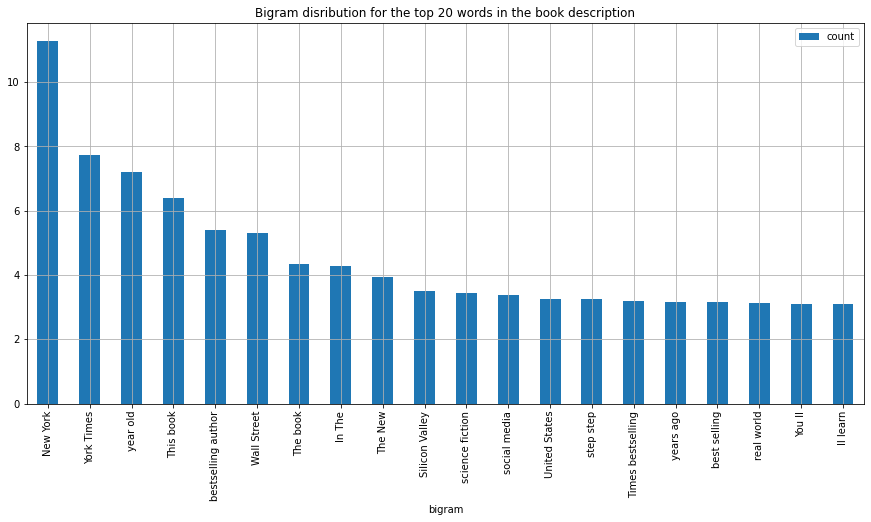

In [14]:
#Converting text descriptions into vectors using TF-IDF
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(books['Desc'])
total_words = tfidf_matrix.sum(axis=0) 

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 

#Taking first 20 records
bigram = bigram.head(20)#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', grid=True, title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

<AxesSubplot:title={'center':'Trigram disribution for the top 20 words in the book description'}, xlabel='trigram'>

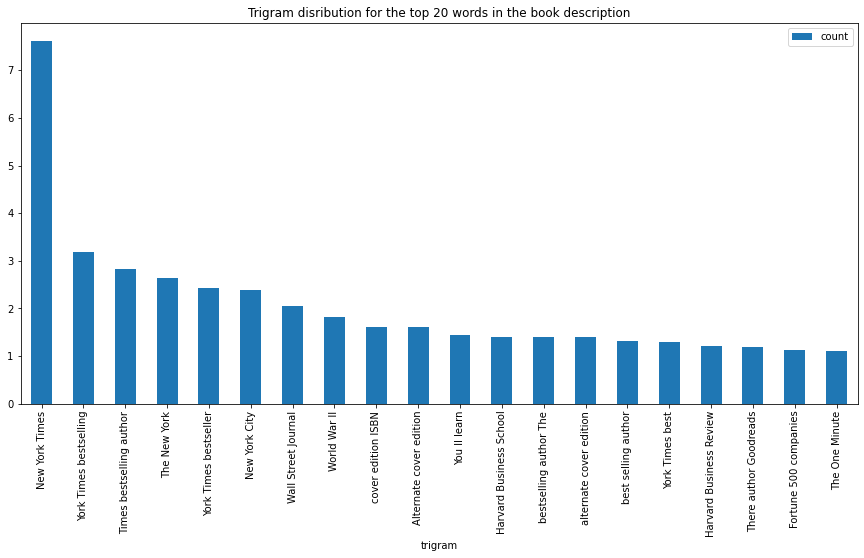

In [15]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(books['Desc'])
total_words = tfidf_matrix.sum(axis=0) 

#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)

#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 

#Taking first 20 records
trigram = trigram.head(20)

#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Trigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [16]:
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO

In [17]:
!pip3 install textblob

In [18]:
import nltk
import pickle
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
import textblob
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JasJap\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\JasJap\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [19]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JasJap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
stop_words = stopwords.words()

def cleaning(text):        
    # converting to lowercase, removing URL links, special characters, and punctuations if any.
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)     

    # removing the emojies
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)   
    
    # removing the stop-words          
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence
    
    return text


In [21]:

clean_data = books['Desc'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(clean_data).split()).most_common(100)
result = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(result)

        Word  Frequency
0        new       1468
1       book       1300
2   business       1267
3      world       1136
4       life       1012
..       ...        ...
95      real        218
96     build        215
97    school        212
98       set        212
99     women        211

[100 rows x 2 columns]


### the top 100 most frequent words

In [22]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [23]:
print(p)

[('new', 1468), ('book', 1300), ('business', 1267), ('world', 1136), ('life', 1012), ('people', 881), ('work', 772), ('story', 767), ('time', 735), ('first', 663), ('way', 646), ('â', 622), ('make', 599), ('us', 594), ('years', 580), ('like', 550), ('love', 517), ('novel', 500), ('even', 461), ('author', 460), ('every', 458), ('best', 450), ('two', 448), ('get', 446), ('success', 434), ('companies', 419), ('lives', 415), ('family', 406), ('company', 396), ('power', 390), ('find', 368), ('help', 366), ('become', 365), ('many', 364), ('great', 360), ('change', 356), ('young', 350), ('shows', 348), ('times', 339), ('readers', 328), ('stories', 321), ('must', 318), ('learn', 315), ('york', 314), ('successful', 313), ('human', 308), ('ever', 305), ('day', 299), ('never', 298), ('powerful', 296), ('american', 292), ('know', 288), ('marketing', 288), ('need', 285), ('well', 285), ('bestselling', 280), ('ideas', 278), ('guide', 278), ('better', 276), ('others', 275), ('financial', 272), ('mana

In [24]:
!pip3 install wordcloud

In [25]:
from wordcloud import WordCloud, ImageColorGenerator

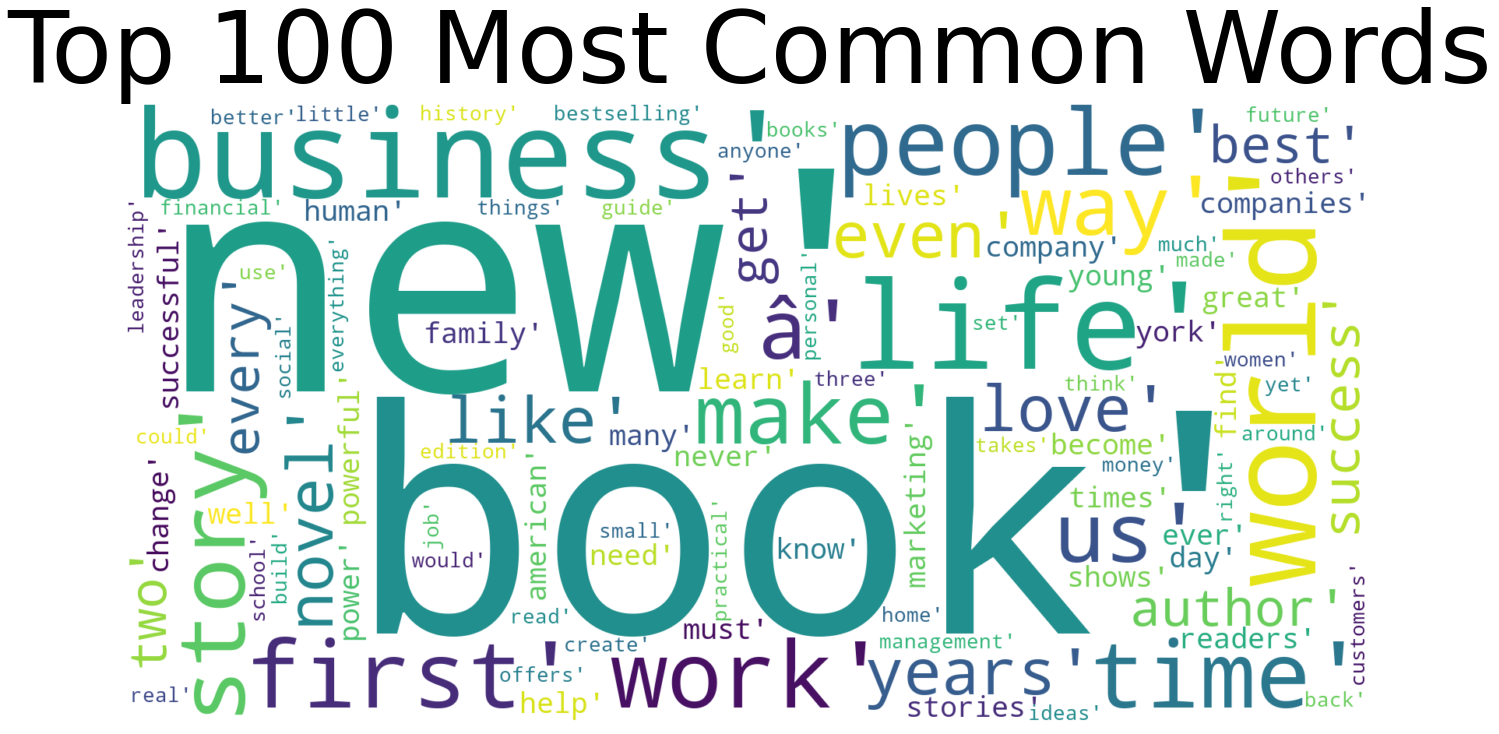

In [26]:
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(p))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

('new', 'book', 'business', 'world', 'life', 'people', 'work', 'story', 'time', 'first', 'way', 'â', 'make', 'us', 'years', 'like', 'love', 'novel', 'even', 'author', 'every', 'best', 'two', 'get', 'success')
(1468, 1300, 1267, 1136, 1012, 881, 772, 767, 735, 663, 646, 622, 599, 594, 580, 550, 517, 500, 461, 460, 458, 450, 448, 446, 434)


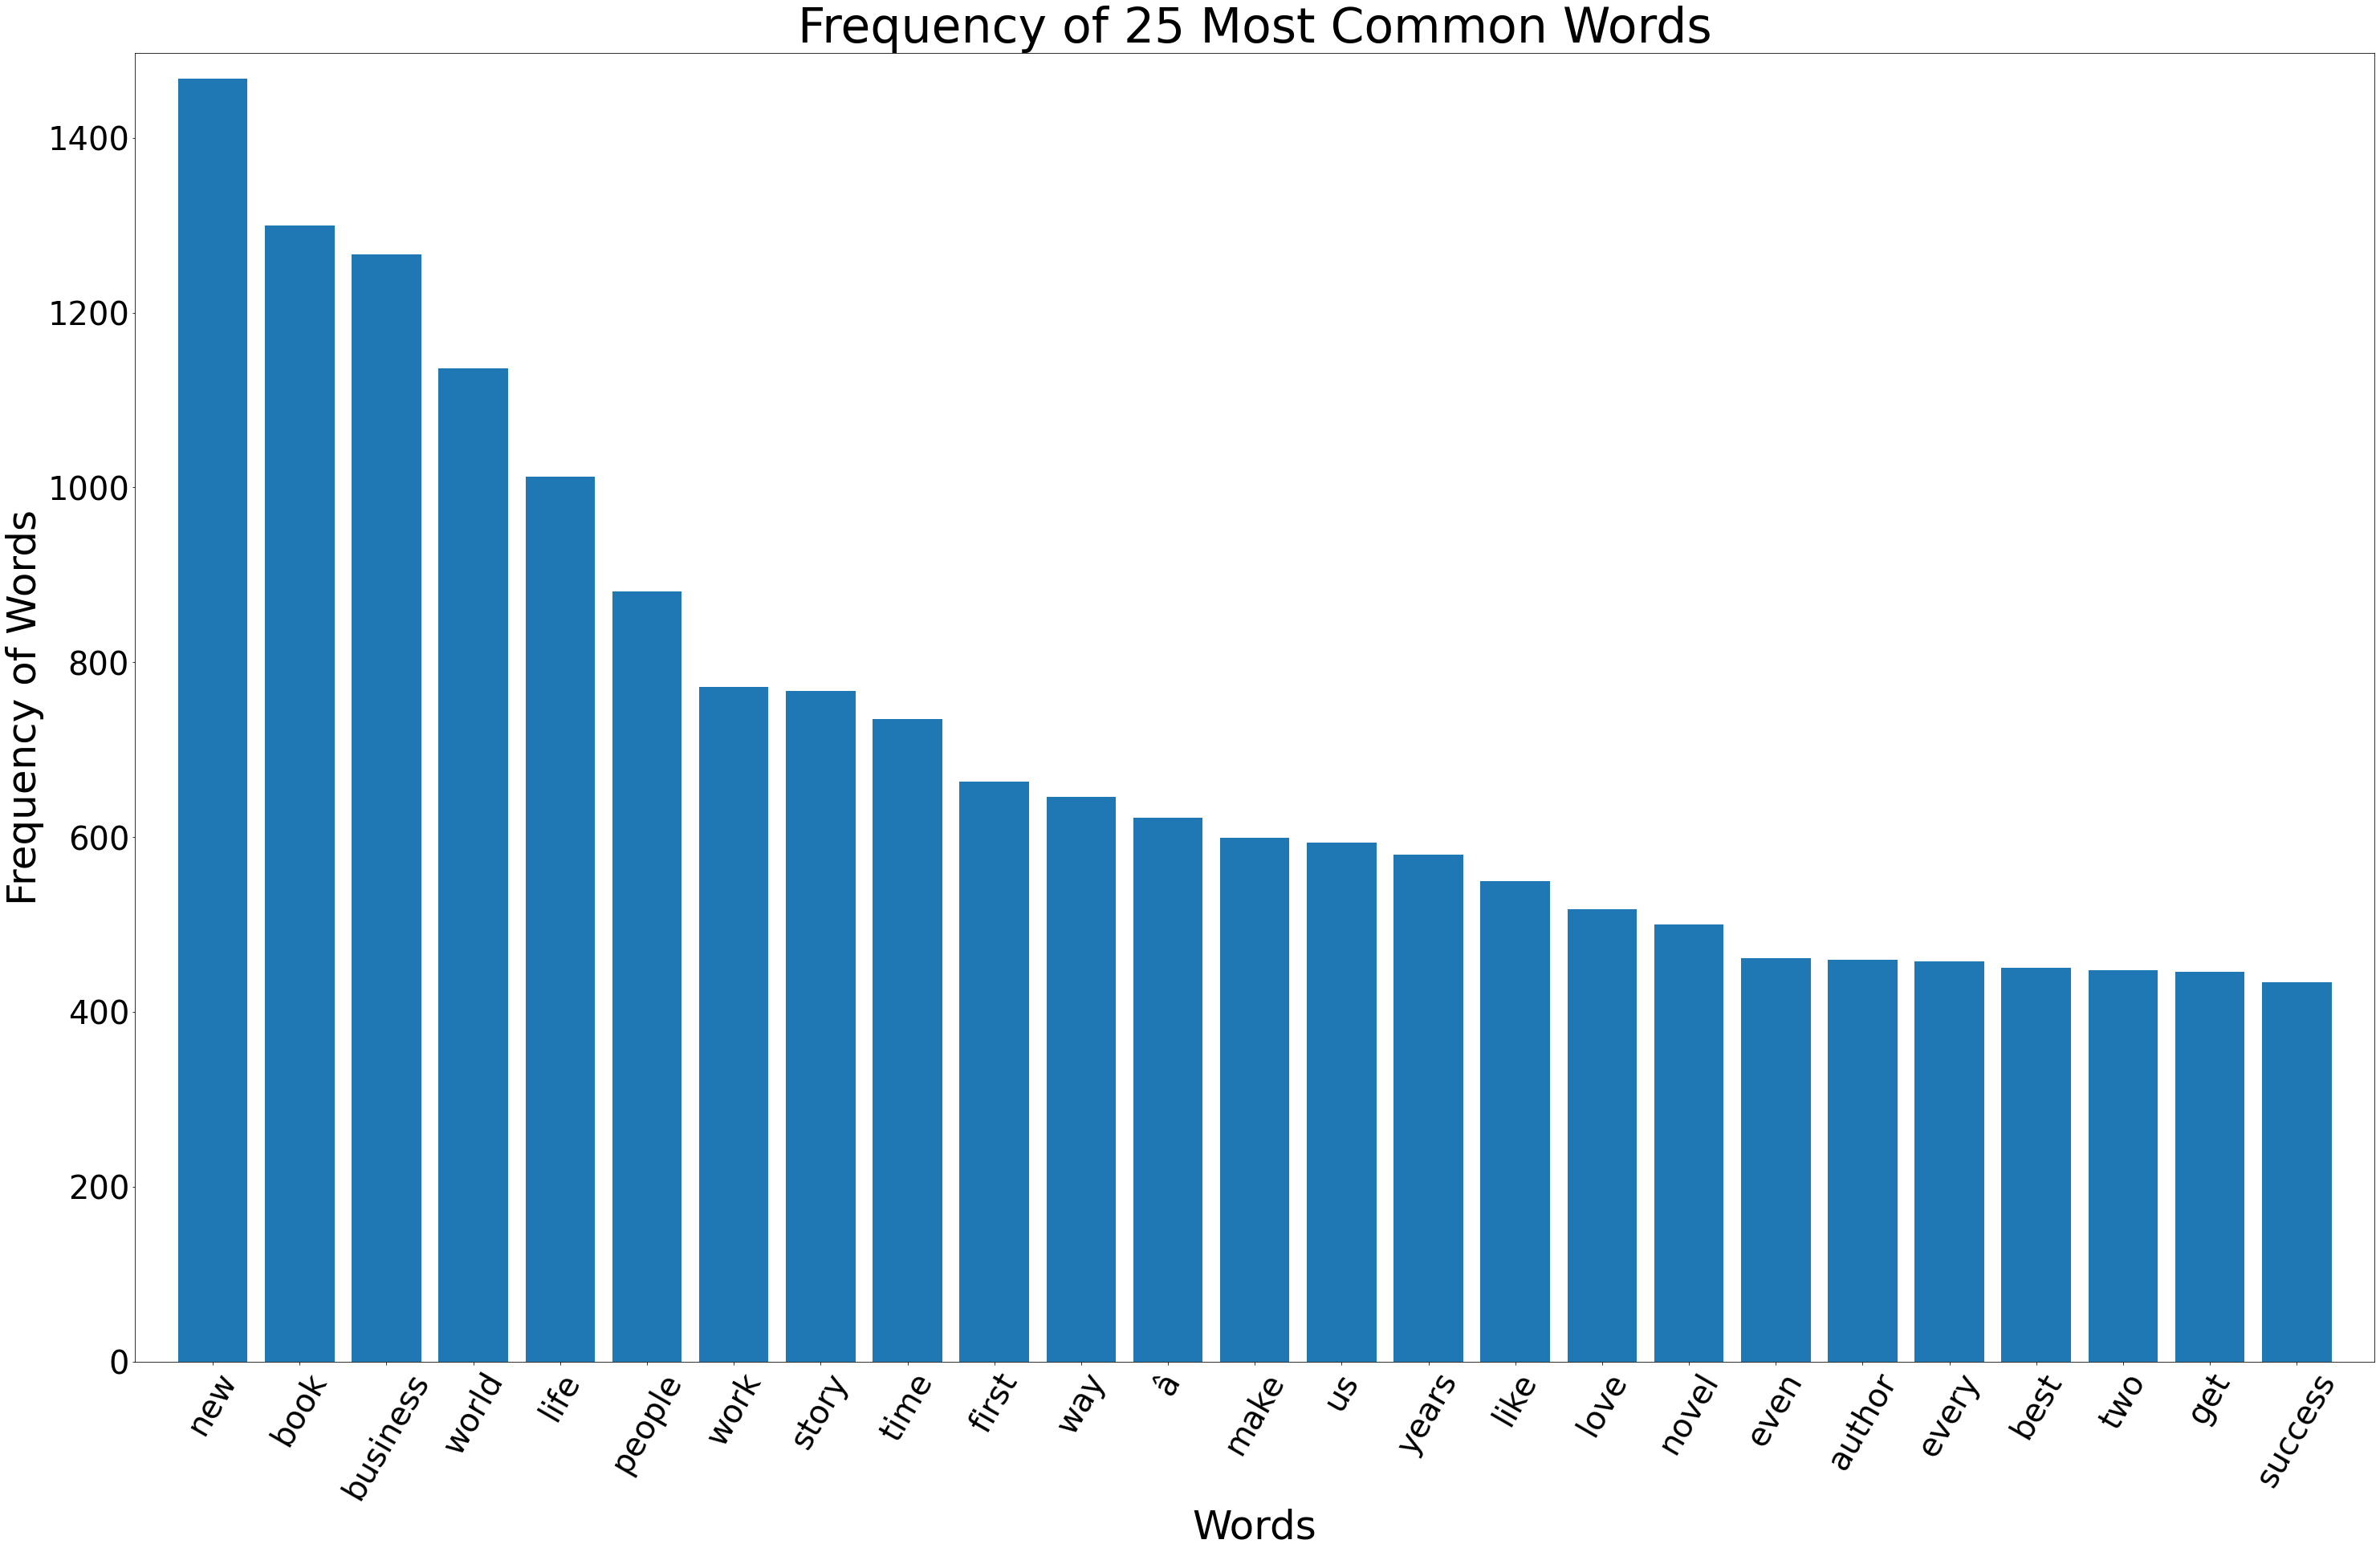

In [27]:
mostcommon_small = Counter(" ".join(clean_data).split()).most_common(25)
x, y = zip(*mostcommon_small)
print(x)
print(y)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=40)
plt.xticks(rotation=60, fontsize=40)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

#### The results of the term frequency analysis output us the terms such as “new”, “book”, “business”, “world”, “life” point to a new books that are business and life of people oriented.  Right now we can see that all the data is in human readable form which the computer cannot understand. So, during content based filtering it should be convert into computer understandable format.